# Ⅲ. 따릉이 이용량 자세히 분석

In [42]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

import json
import folium
from folium import plugins

geo_path = './대학원/데이터/따릉이 데이터/seoul_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding = 'utf-8'))

In [2]:
df1 = pd.read_csv('./대학원/데이터/따릉이 데이터/정리 데이터/공공자전거 대여이력/공공자전거 대여이력_2020.07.csv', engine = 'python')
df1

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-30768,2020-07-01 00:00:02,2279,교대역 5번출구뒤,0,2020-07-01 00:08:06,2266,서초역 3번출구,0,8,1057.48
1,SPB-31739,2020-07-01 00:00:02,2621,한성백제역 2번 출구,0,2020-07-01 00:08:53,1218,방이역 4번출구,0,9,1313.50
2,SPB-35374,2020-07-01 00:00:04,146,마포역 2번출구 뒤,0,2020-07-01 00:04:22,148,용강동 주민센터 앞,0,4,0.00
3,SPB-21842,2020-07-01 00:00:08,251,서울지방병무청 버스정류장,3,2020-07-01 00:14:19,1911,구로디지털단지역 앞,9,13,3240.00
4,SPB-35459,2020-07-01 00:00:14,265,영등포유통상가 사거리,0,2020-07-01 00:10:00,283,아크로타워 스퀘어(영등포시장),0,10,0.00
...,...,...,...,...,...,...,...,...,...,...,...
2544875,SPB-36279,2020-07-31 23:59:50,272,당산육갑문,0,2020-08-01 00:03:08,3215,강변삼성래미안,0,3,0.00
2544876,SPB-33523,2020-07-31 23:59:52,834,효창공원앞역 3번출구 뒤,0,2020-08-01 00:07:47,818,숙명여대 입구 교차로,0,8,0.00
2544877,SPB-31478,2020-07-31 23:59:53,2002,노들역 1번출구,0,2020-08-01 00:05:54,2002,노들역 1번출구,0,6,0.00
2544878,SPB-38097,2020-07-31 23:59:55,3586,군자역 비채온 오피스텔,0,2020-08-01 00:06:16,3549,건영아파트 앞,0,6,0.00


In [3]:
df2 = pd.read_csv('./대학원/데이터/따릉이 데이터/정리 데이터/공공자전거 대여이력/공공자전거 대여이력_2020.08.csv', engine = 'python')
df2

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-31470,2020-08-01 00:00:01,714,한국SGI 양천문화회관 앞,0,2020-08-01 00:03:47,740,으뜸공원,0,4,0.0
1,SPB-33655,2020-08-01 00:00:01,2549,LH 서초 4단지 403동,0,2020-08-01 00:56:05,2549,LH 서초 4단지 403동,0,56,0.0
2,SPB-33402,2020-08-01 00:00:01,1017,맥도날드(길동),0,2020-08-01 00:08:35,1019,다성이즈빌아파트(호원대 대각선 맞은편),0,9,0.0
3,SPB-42406,2020-08-01 00:00:04,1402,금란주차장 앞,0,2020-08-01 00:16:15,1447,면목역 3번출구,0,16,0.0
4,SPB-38679,2020-08-01 00:00:06,592,건국대학교 학생회관,0,2020-08-01 00:13:57,513,뚝섬역 5번 출구 정류소 옆,0,14,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1715225,SPB-36683,2020-08-31 23:59:47,519,양지사거리,0,2020-09-01 00:09:02,378,청계7가 사거리,0,9,0.0
1715226,SPB-37010,2020-08-31 23:59:50,2228,뒷벌공원 옆,0,2020-09-01 00:03:32,2264,이수역 1번출구,0,4,0.0
1715227,SPB-41286,2020-08-31 23:59:54,130,신촌역(2호선) 7번출구 앞,0,2020-09-01 00:24:55,170,가재울 뉴타운 주유소 옆,0,25,0.0
1715228,SPB-40184,2020-08-31 23:59:55,502,뚝섬유원지역 1번출구 앞,0,2020-09-01 00:50:40,502,뚝섬유원지역 1번출구 앞,0,51,0.0


In [4]:
df3 = pd.read_csv('./대학원/데이터/따릉이 데이터/정리 데이터/공공자전거 대여이력/공공자전거 대여이력_2020.09.csv', engine = 'python')
df3

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-42373,2020-09-01 00:00:28,787,양천아파트 입구,0,2020-09-01 00:01:58,787,양천아파트 입구,0,2,0.0
1,SPB-35204,2020-09-01 00:00:18,1440,하나은행 면목지점,0,2020-09-01 00:02:23,1440,하나은행 면목지점,0,2,0.0
2,SPB-32450,2020-09-01 00:01:11,1041,묘곡초등학교,0,2020-09-01 00:04:00,1083,광문고교사거리(아이파크),0,3,0.0
3,SPB-32422,2020-09-01 00:01:05,240,문래역 4번출구 앞,0,2020-09-01 00:04:33,262,영문초등학교 사거리,0,3,0.0
4,SPB-35520,2020-09-01 00:00:00,2137,KT&G 관악지점,0,2020-09-01 00:04:43,2169,봉천역 2번출구,0,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2784698,SPB-37145,2020-09-30 17:01:22,2369,KT선릉타워,0,2020-10-01 12:22:32,2369,KT선릉타워,0,1161,0.0
2784699,SPB-41234,2020-09-30 17:30:53,1300,오륜사거리,0,2020-10-01 13:16:02,1213,백토공원 앞,0,1185,0.0
2784700,SPB-32681,2020-09-30 20:44:08,701,목동사거리 부근,0,2020-10-01 13:34:55,752,성원2차 아파트,0,1011,0.0
2784701,SPB-31286,2020-09-30 15:20:14,284,센트럴 푸르지오 시티 앞,0,2020-10-01 17:35:05,703,오목교역 7번출구 앞,0,1575,0.0


In [5]:
df4 = pd.read_csv('./대학원/데이터/따릉이 데이터/정리 데이터/공공자전거 대여이력/공공자전거 대여이력_2020.10.csv', engine = 'python')
df4

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-32784,2020-10-01 00:00:19,2403,공무원연금매점 교차로 (개포주공9단지 입구),0,2020-10-01 00:03:56,2423,영희초교 사거리(래미안개포루체하임),0,4,0.0
1,SPB-33175,2020-10-01 00:01:20,1946,구로역 광장,0,2020-10-01 00:04:09,1946,구로역 광장,0,3,0.0
2,SPB-35926,2020-10-01 00:02:57,1541,삼양역,0,2020-10-01 00:04:53,1541,삼양역,0,2,0.0
3,SPB-21575,2020-10-01 00:00:07,1161,강서면허시험장앞,1,2020-10-01 00:04:59,1184,마곡13단지,11,4,850.0
4,SPB-19842,2020-10-01 00:01:47,2264,이수역 1번출구,4,2020-10-01 00:05:06,2228,뒷벌공원 옆,17,3,540.0
...,...,...,...,...,...,...,...,...,...,...,...
2869177,SPB-39736,2020-10-31 21:25:40,1199,우장산역 3번출구,0,2020-11-01 08:26:40,2737,까치산역 3번 출구,0,661,0.0
2869178,SPB-50812,2020-10-31 22:49:34,1090,상일동역 2번출구 앞,0,2020-11-01 08:40:06,1016,해뜨는 주유소옆 리엔파크 109동앞,0,591,0.0
2869179,SPB-44402,2020-10-31 22:09:40,765,오목교역 3번출구,0,2020-11-01 10:07:54,764,목동청소년수련관,0,718,0.0
2869180,SPB-51314,2020-10-31 22:33:53,838,숙대입구역 4번출구,0,2020-11-01 16:30:50,445,대한상공회의소,0,1077,0.0


In [6]:
df5 = pd.read_csv('./대학원/데이터/따릉이 데이터/정리 데이터/공공자전거 대여이력/공공자전거 대여이력_2020.11.csv', engine = 'python')
df5

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-36740,2020-11-01 00:01:00,1149,신방화역환승주차장,0,2020-11-01 00:03:39,2702,마곡 엠밸리2단지,0,3,0.0
1,SPB-37147,2020-11-01 00:02:09,3520,광진경찰서,0,2020-11-01 00:04:20,3501,광진구청 앞,0,2,0.0
2,SPB-30331,2020-11-01 00:00:12,3009,서교동사거리(신),0,2020-11-01 00:04:25,3010,홍대입구역 3번출구,0,4,0.0
3,SPB-36835,2020-11-01 00:01:52,2711,가로공원공영주차장 1번 출구,0,2020-11-01 00:04:27,1127,화곡역(에이스정형외과앞) 버스정류장,0,3,0.0
4,SPB-31250,2020-11-01 00:03:31,1637,KT 노원점 건물 앞,0,2020-11-01 00:05:04,1637,KT 노원점 건물 앞,0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1975132,SPB-51218,2020-11-30 23:38:28,1617,하계동 중평어린이공원 앞,0,2020-12-01 01:35:30,1656,중앙하이츠 아파트 입구,0,117,0.0
1975133,SPB-33827,2020-11-30 23:54:12,153,성산2교 사거리,0,2020-12-01 01:46:38,153,성산2교 사거리,0,112,0.0
1975134,SPB-42198,2020-11-30 21:15:52,170,가재울 뉴타운 주유소 옆,0,2020-12-01 02:08:20,165,중앙근린공원,0,292,0.0
1975135,SPB-35244,2020-11-30 21:29:15,2111,서울대입구역 1번출구,0,2020-12-01 02:49:14,2284,CJ오쇼핑앞,0,320,0.0


In [7]:
df6 = pd.read_csv('./대학원/데이터/따릉이 데이터/정리 데이터/공공자전거 대여이력/공공자전거 대여이력_2020.12.csv', engine = 'python')
df6

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-33225,2020-12-01 00:00:05,671,대광빌딩,0,2020-12-01 00:01:45,672,대광고등학교,0,2,0.00
1,SPB-32037,2020-12-01 00:00:49,352,중앙고입구 삼거리,0,2020-12-01 00:02:33,353,재동초교 앞 삼거리,0,2,0.00
2,SPB-33654,2020-12-01 00:01:37,2644,성내5교 (GS주유소),0,2020-12-01 00:03:57,1277,오금동 송파 참병원,0,2,0.00
3,SPB-52806,2020-12-01 00:01:00,1953,천왕역 4번출구 뒤,0,2020-12-01 00:04:10,1952,천왕연지타운2단지 앞,0,3,0.00
4,SPB-80266,2020-12-01 00:00:53,1036,고덕동 주양쇼핑,99,2020-12-01 00:04:34,1036,고덕동 주양쇼핑,99,4,80.00
...,...,...,...,...,...,...,...,...,...,...,...
1185902,SPB-32746,2020-12-31 20:36:25,1009,천호역4번출구(현대백화점),0,2021-01-01 01:52:00,1022,길동 사거리(초소앞),0,315,1869.66
1185903,SPB-30390,2020-12-31 22:51:36,1965,삼환로즈빌아파트 105동 옆,0,2021-01-01 02:29:15,210,IFC몰,0,217,16245.85
1185904,SPB-50439,2020-12-31 22:56:32,1964,원메디타운 앞,0,2021-01-01 02:29:32,210,IFC몰,0,213,0.00
1185905,SPB-37080,2020-12-31 22:18:07,130,신촌역(2호선) 7번출구 앞,0,2021-01-01 02:47:57,148,용강동 주민센터 앞,0,269,1627.36


In [8]:
df7 = pd.read_csv('./대학원/데이터/따릉이 데이터/정리 데이터/공공자전거 대여이력/공공자전거 대여이력_2021.01.csv', engine = 'python')
df7

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25,0.00
1,SPB-53074,2021-01-04 16:02:12,3,중랑센터,0,2021-01-04 16:17:06,668,서울축산농협(장안지점),0,14,0.00
2,SPB-50952,2021-01-13 21:02:05,3,중랑센터,0,2021-01-13 21:14:04,668,서울축산농협(장안지점),0,11,1853.99
3,SPB-52380,2021-01-14 21:02:55,3,중랑센터,0,2021-01-14 21:13:41,668,서울축산농협(장안지점),0,10,0.00
4,SPB-52380,2021-01-18 18:02:08,3,중랑센터,0,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,0,13,2291.05
...,...,...,...,...,...,...,...,...,...,...,...
806498,SPB-81270,2021-01-24 20:13:33,9999,상담센터,0,2021-01-24 20:56:28,2908,광운대학교 중앙도서관,99,42,3730.00
806499,SPB-39891,2021-01-25 12:10:06,9999,상담센터,0,2021-01-25 12:35:20,626,군자교 서측 녹지대,0,25,3680.00
806500,SPB-32679,2021-01-27 14:47:18,9999,상담센터,0,2021-01-27 15:12:45,2299,한전아트센터 앞,0,25,2471.37
806501,SPB-80712,2021-01-31 14:39:45,9999,상담센터,0,2021-01-31 15:46:49,175,홍연2교옆,99,67,4050.00


In [9]:
df8 = pd.read_csv('./대학원/데이터/따릉이 데이터/정리 데이터/공공자전거 대여이력/공공자전거 대여이력_2021.02.csv', engine = 'python')
df8

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-51323,2021-02-01 00:00:38,1514,강북구청 사거리 버스정류소 앞,0,2021-02-01 00:03:05,1554,번동사거리,0,2,736.02
1,SPB-52771,2021-02-01 00:01:09,1977,천왕역 1번 출입구 앞,0,2021-02-01 00:04:59,1981,천왕이펜하우스5단지 앞,0,3,856.09
2,SPB-33780,2021-02-01 00:02:48,1358,정릉도서관 앞,0,2021-02-01 00:05:10,1360,정릉역,0,2,397.92
3,SPB-52936,2021-02-01 00:00:39,1211,방이삼거리,0,2021-02-01 00:05:27,2639,석촌역 8번출구,0,4,1015.50
4,SPB-41150,2021-02-01 00:01:59,1721,창동역 2번출구,0,2021-02-01 00:06:10,1708,보건소사거리(다비치안경창동점),0,4,0.00
...,...,...,...,...,...,...,...,...,...,...,...
1226387,SPB-35567,2021-02-28 23:21:55,2910,도깨비시장,0,2021-02-28 23:59:48,1726,삼익세라믹아파트교차로,0,37,6403.05
1226388,SPB-52298,2021-02-28 23:32:22,1336,성북3교 위,0,2021-02-28 23:59:49,346,맥스타일 앞,0,27,3839.32
1226389,SPB-43850,2021-02-28 22:56:01,590,건국대학교 (입학정보관),0,2021-02-28 23:59:54,502,뚝섬유원지역 1번출구 앞,0,63,2021.30
1226390,SPB-31466,2021-02-28 23:09:27,283,아크로타워 스퀘어(영등포시장),0,2021-02-28 23:59:56,283,아크로타워 스퀘어(영등포시장),0,50,8361.71


In [10]:
df9 = pd.read_csv('./대학원/데이터/따릉이 데이터/정리 데이터/공공자전거 대여이력/공공자전거 대여이력_2021.03.csv', engine = 'python')
df9

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-50838,2021-02-28 23:14:47,1203,밀리아나2빌딩 앞,0,2021-03-01 00:00:03,1211,방이삼거리,0,45,3553.80
1,SPB-44343,2021-02-28 23:15:01,4480,가락시장역 롯데마트2,0,2021-03-01 00:00:03,3579,광진 캠퍼스시티,0,45,10426.18
2,SPB-33391,2021-02-28 23:32:33,1336,성북3교 위,0,2021-03-01 00:00:05,346,맥스타일 앞,0,27,3773.41
3,SPB-43223,2021-02-28 23:06:35,1012,서울 상운차량,0,2021-03-01 00:00:07,1002,해공공원(천호동),0,53,2695.24
4,SPB-32340,2021-02-28 23:18:18,2312,청담역 13번 출구 앞,0,2021-03-01 00:00:09,2503,반포1동 서초빌딩 앞,0,41,9092.37
...,...,...,...,...,...,...,...,...,...,...,...
2171928,SPB-31667,2021-03-31 23:35:58,700,KB국민은행 염창역 지점 앞,0,2021-03-31 23:59:54,702,목4동주민센터 옆,0,23,2878.63
2171929,SPB-38293,2021-03-31 22:17:29,1111,마곡엠밸리6_7단지 마곡중학교,0,2021-03-31 23:59:55,3796,송정역 3번출구 앞,0,102,2449.49
2171930,SPB-31383,2021-03-31 23:50:17,947,연신내 선일하이츠빌 정류소,0,2021-03-31 23:59:56,962,은평뉴타운 힐데스하임,0,9,1958.25
2171931,SPB-35281,2021-03-31 23:32:42,2228,뒷벌공원 옆,0,2021-03-31 23:59:56,2082,7호선 이수역7번출구,0,27,3780.21


In [11]:
df10= pd.read_csv('./대학원/데이터/따릉이 데이터/정리 데이터/공공자전거 대여이력/공공자전거 대여이력_2021.04.csv', engine = 'python')
df10

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-31332,2021-03-31 22:04:39,585,성수2가1동 공영주차장 인근,0,2021-04-01 00:00:01,3571,화양 APT(횡단보도 옆),0,115,0.00
1,SPB-53010,2021-03-31 23:47:26,2408,강남한양수자인아파트,0,2021-04-01 00:00:03,2615,테라타워2,0,12,1552.44
2,SPB-50637,2021-03-31 23:38:54,1222,잠실새내역 5번 출구 뒤,0,2021-04-01 00:00:04,2631,배명고등학교,0,21,2476.53
3,SPB-81056,2021-03-31 23:58:28,1709,쌍문역4번출구 주변,99,2021-04-01 00:00:06,1774,반석교회(쌍문동),99,1,0.00
4,SPB-40739,2021-03-31 23:47:27,2745,수명초등학교,0,2021-04-01 00:00:06,2746,수명산파크 4단지 411동 앞,0,12,628.75
...,...,...,...,...,...,...,...,...,...,...,...
3027461,SPB-53450,2021-04-30 23:57:21,1013,강동구청역 1번 출입구,0,2021-04-30 23:59:56,1020,강동경찰서,0,2,548.38
3027462,SPB-35293,2021-04-30 22:41:41,2301,현대고등학교 건너편,0,2021-04-30 23:59:56,2429,압구정로데오역 6번출구,0,78,2750.40
3027463,SPB-36957,2021-04-30 23:33:45,3803,세븐일레븐 신림점,0,2021-04-30 23:59:57,3803,세븐일레븐 신림점,0,26,6191.43
3027464,SPB-44673,2021-04-30 23:23:18,2173,당곡사거리,0,2021-04-30 23:59:58,2179,양녕로 입구,0,36,2930.55


In [12]:
df11 = pd.read_csv('./대학원/데이터/따릉이 데이터/정리 데이터/공공자전거 대여이력/공공자전거 대여이력_2021.05.csv', engine = 'python')
df11

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-51372,2021-04-30 23:13:46,605,신설동역8번출구,0,2021-05-01 00:00:03,4710,자교교회 앞,0,46,6234.92
1,SPB-51159,2021-04-30 23:52:51,2277,길마중4교 하부,0,2021-05-01 00:00:04,2525,반포쇼핑타운 2동 앞,0,7,1660.90
2,SPB-32374,2021-04-30 23:52:31,703,오목교역 7번출구 앞,0,2021-05-01 00:00:04,796,목동아파트 14단지 B상가 앞,0,7,1377.78
3,SPB-39733,2021-04-30 23:50:46,1721,창동역 2번출구,0,2021-05-01 00:00:05,1690,도봉운전면허시험장,0,9,1404.03
4,SPB-81816,2021-04-30 23:51:57,1351,안암2교 옆,99,2021-05-01 00:00:05,378,청계7가 사거리,99,8,1770.00
...,...,...,...,...,...,...,...,...,...,...,...
2935434,SPB-31282,2021-05-31 23:48:22,2190,도원맨션,0,2021-05-31 23:59:57,2102,봉림교 교통섬,0,11,1145.32
2935435,SPB-50316,2021-05-31 23:55:04,1106,신방화사거리,0,2021-05-31 23:59:57,1103,방화역 4번출구앞,0,4,639.19
2935436,SPB-44035,2021-05-31 23:51:12,1627,수락산역 4번출구,0,2021-05-31 23:59:58,1727,서울도봉초등학교인근,0,8,1383.25
2935437,SPB-50409,2021-05-31 23:31:37,1008,암사역 3번출구(국민은행앞),0,2021-05-31 23:59:58,544,광남중학교,0,28,3234.21


In [13]:
df12 = pd.read_csv('./대학원/데이터/따릉이 데이터/정리 데이터/공공자전거 대여이력/공공자전거 대여이력_2021.06.csv', engine = 'python')
df12

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-30385,2021-05-31 23:07:00,3571,화양 APT(횡단보도 옆),0,2021-06-01 00:00:00,3538,서울숲 IT캐슬,0,53,2502.80
1,SPB-46321,2021-05-31 23:37:19,1911,구로디지털단지역 앞,0,2021-06-01 00:00:02,1843,독산고등학교,0,22,1630.00
2,SPB-48119,2021-05-31 23:48:40,3860,건국대학교 정문 앞,0,2021-06-01 00:00:03,3586,군자역 비채온 오피스텔,0,11,1420.00
3,SPB-55360,2021-05-31 23:47:52,2222,사당역 12번출구 뒤,0,2021-06-01 00:00:05,2228,뒷벌공원 옆,0,12,1350.00
4,SPB-54699,2021-05-31 23:51:14,1955,디지털입구 교차로,0,2021-06-01 00:00:08,1856,모두의학교,0,8,930.00
...,...,...,...,...,...,...,...,...,...,...,...
3445866,SPB-36886,2021-06-30 22:44:14,152,마포구민체육센터 앞,0,2021-07-01 04:48:33,126,서강대 후문 옆,0,364,10153.36
3445867,SPB-30409,2021-06-30 22:45:19,152,마포구민체육센터 앞,0,2021-07-01 04:52:25,437,대흥역 1번출구,0,367,10100.71
3445868,SPB-46230,2021-06-30 22:43:43,152,마포구민체육센터 앞,0,2021-07-01 04:52:27,437,대흥역 1번출구,0,368,430.00
3445869,SPB-41691,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:29,2526,반포경남쇼핑 앞,0,404,0.00


In [14]:
df = df1.append(df2, ignore_index = True)
df = df.append(df3, ignore_index = True)
df = df.append(df4, ignore_index = True)
df = df.append(df5, ignore_index = True)
df = df.append(df6, ignore_index = True)
df = df.append(df7, ignore_index = True)
df = df.append(df8, ignore_index = True)
df = df.append(df9, ignore_index = True)
df = df.append(df10, ignore_index = True)
df = df.append(df11, ignore_index = True)
df = df.append(df12, ignore_index = True)
df

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-30768,2020-07-01 00:00:02,2279,교대역 5번출구뒤,0,2020-07-01 00:08:06,2266,서초역 3번출구,0,8,1057.48
1,SPB-31739,2020-07-01 00:00:02,2621,한성백제역 2번 출구,0,2020-07-01 00:08:53,1218,방이역 4번출구,0,9,1313.50
2,SPB-35374,2020-07-01 00:00:04,146,마포역 2번출구 뒤,0,2020-07-01 00:04:22,148,용강동 주민센터 앞,0,4,0.00
3,SPB-21842,2020-07-01 00:00:08,251,서울지방병무청 버스정류장,3,2020-07-01 00:14:19,1911,구로디지털단지역 앞,9,13,3240.00
4,SPB-35459,2020-07-01 00:00:14,265,영등포유통상가 사거리,0,2020-07-01 00:10:00,283,아크로타워 스퀘어(영등포시장),0,10,0.00
...,...,...,...,...,...,...,...,...,...,...,...
26688638,SPB-36886,2021-06-30 22:44:14,152,마포구민체육센터 앞,0,2021-07-01 04:48:33,126,서강대 후문 옆,0,364,10153.36
26688639,SPB-30409,2021-06-30 22:45:19,152,마포구민체육센터 앞,0,2021-07-01 04:52:25,437,대흥역 1번출구,0,367,10100.71
26688640,SPB-46230,2021-06-30 22:43:43,152,마포구민체육센터 앞,0,2021-07-01 04:52:27,437,대흥역 1번출구,0,368,430.00
26688641,SPB-41691,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:29,2526,반포경남쇼핑 앞,0,404,0.00


In [15]:
df = df.sort_values('대여일시', ignore_index = True)
df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-30768,2020-07-01 00:00:02,2279,교대역 5번출구뒤,0,2020-07-01 00:08:06,2266,서초역 3번출구,0,8,1057.48
1,SPB-31739,2020-07-01 00:00:02,2621,한성백제역 2번 출구,0,2020-07-01 00:08:53,1218,방이역 4번출구,0,9,1313.50
2,SPB-35374,2020-07-01 00:00:04,146,마포역 2번출구 뒤,0,2020-07-01 00:04:22,148,용강동 주민센터 앞,0,4,0.00
3,SPB-21842,2020-07-01 00:00:08,251,서울지방병무청 버스정류장,3,2020-07-01 00:14:19,1911,구로디지털단지역 앞,9,13,3240.00
4,SPB-35459,2020-07-01 00:00:14,265,영등포유통상가 사거리,0,2020-07-01 00:10:00,283,아크로타워 스퀘어(영등포시장),0,10,0.00


In [16]:
#df.to_csv('./공공자전거 대여이력_2020.07_2021.06.csv', index = False, encoding = 'cp949')

In [17]:
df.shape

(26688643, 11)

In [18]:
df.tail()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
26688638,SPB-35577,2021-06-30 23:56:16,2002,노들역 1번출구,0,2021-07-01 00:03:17,2003,사육신공원앞,0,7,0.0
26688639,SPB-81623,2021-06-30 23:56:22,4619,한강트럼프월드3차 앞,99,2021-07-01 00:06:14,4619,한강트럼프월드3차 앞,99,10,0.0
26688640,SPB-46742,2021-06-30 23:56:22,348,독립문역 사거리,0,2021-07-01 00:04:52,367,독립문역 3-1번출구,0,9,0.0
26688641,SPB-50832,2021-06-30 23:58:26,250,대림아파트 사거리,0,2021-07-01 00:06:51,257,신길삼거리(우리은행),0,8,0.0
26688642,SPB-45880,2021-06-30 23:58:42,1977,천왕역 1번 출입구 앞,0,2021-07-01 00:15:37,3906,천왕차량사업소 입구,0,16,1350.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26688643 entries, 0 to 26688642
Data columns (total 11 columns):
 #   Column   Dtype  
---  ------   -----  
 0   자전거번호    object 
 1   대여일시     object 
 2   대여대여소번호  int64  
 3   대여대여소명   object 
 4   대여거치대    int64  
 5   반납일시     object 
 6   반납대여소번호  int64  
 7   반납대여소명   object 
 8   반납거치대    int64  
 9   이용시간     int64  
 10  이용거리     float64
dtypes: float64(1), int64(5), object(5)
memory usage: 2.2+ GB


- 대여일시랑 반납일시 칼럼 datetime타입으로 변경

In [20]:
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])

In [21]:
df['대여일'] = df['대여일시'].dt.day
df['대여요일'] = df['대여일시'].dt.dayofweek
df['대여시간'] = df['대여일시'].dt.hour
df['반납시간'] = df['반납일시'].dt.hour

In [22]:
df.info(memory_usage = 'deep') # 메모리 사용량 줄임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26688643 entries, 0 to 26688642
Data columns (total 15 columns):
 #   Column   Dtype         
---  ------   -----         
 0   자전거번호    object        
 1   대여일시     datetime64[ns]
 2   대여대여소번호  int64         
 3   대여대여소명   object        
 4   대여거치대    int64         
 5   반납일시     datetime64[ns]
 6   반납대여소번호  int64         
 7   반납대여소명   object        
 8   반납거치대    int64         
 9   이용시간     int64         
 10  이용거리     float64       
 11  대여일      int64         
 12  대여요일     int64         
 13  대여시간     int64         
 14  반납시간     int64         
dtypes: datetime64[ns](2), float64(1), int64(9), object(3)
memory usage: 9.1 GB


In [23]:
df.isnull().sum()

자전거번호      0
대여일시       0
대여대여소번호    0
대여대여소명     0
대여거치대      0
반납일시       0
반납대여소번호    0
반납대여소명     0
반납거치대      0
이용시간       0
이용거리       0
대여일        0
대여요일       0
대여시간       0
반납시간       0
dtype: int64

In [24]:
# 일부 칼럼 타입 카테고리로 변환

df = df.astype({'자전거번호' : 'category', '대여대여소번호' : 'category', '대여대여소명' : 'category', '대여거치대' : 'category',
               '반납대여소번호' : 'category', '반납대여소명' : 'category', '반납거치대' : 'category'})

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26688643 entries, 0 to 26688642
Data columns (total 15 columns):
 #   Column   Dtype         
---  ------   -----         
 0   자전거번호    category      
 1   대여일시     datetime64[ns]
 2   대여대여소번호  category      
 3   대여대여소명   category      
 4   대여거치대    category      
 5   반납일시     datetime64[ns]
 6   반납대여소번호  category      
 7   반납대여소명   category      
 8   반납거치대    category      
 9   이용시간     int64         
 10  이용거리     float64       
 11  대여일      int64         
 12  대여요일     int64         
 13  대여시간     int64         
 14  반납시간     int64         
dtypes: category(7), datetime64[ns](2), float64(1), int64(5)
memory usage: 1.9 GB


- 대여소 번호만 있고 자치구는 안쓰여 있음
- 대여소 정보 데이터를 가져와서 병합

In [26]:
rental = pd.read_csv('./대학원/데이터/따릉이 데이터/정리 데이터/공공자전거 대여소 정보(21.06월 기준).csv')
rental.head()

,대여소 번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치 시기,LCD 거치대수,QR 거치대수,운영 방식
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06,20.0,NaN,LCD
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06,14.0,NaN,LCD
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06,13.0,NaN,LCD
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06,5.0,NaN,LCD
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2015-09-06,10.0,NaN,LCD


In [27]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여소 번호     2467 non-null   int64  
 1   보관소(대여소)명  2467 non-null   object 
 2   자치구        2467 non-null   object 
 3   상세주소       2467 non-null   object 
 4   위도         2467 non-null   float64
 5   경도         2467 non-null   float64
 6   설치 시기      2467 non-null   object 
 7   LCD 거치대수   1454 non-null   float64
 8   QR 거치대수    1014 non-null   float64
 9   운영 방식      2467 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 192.9+ KB


In [28]:
rental = rental.astype({'자치구' : 'category', '대여소 번호' : 'category', '위도' : 'category', '경도' : 'category'})

In [29]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   대여소 번호     2467 non-null   category
 1   보관소(대여소)명  2467 non-null   object  
 2   자치구        2467 non-null   category
 3   상세주소       2467 non-null   object  
 4   위도         2467 non-null   category
 5   경도         2467 non-null   category
 6   설치 시기      2467 non-null   object  
 7   LCD 거치대수   1454 non-null   float64 
 8   QR 거치대수    1014 non-null   float64 
 9   운영 방식      2467 non-null   object  
dtypes: category(4), float64(2), object(4)
memory usage: 430.3+ KB


- 대여 지역 먼저 합치기

In [30]:
rental = rental.rename(columns = {'대여소 번호' : '대여대여소번호'})
rental

,대여대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치 시기,LCD 거치대수,QR 거치대수,운영 방식
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06,20.0,NaN,LCD
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06,14.0,NaN,LCD
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06,13.0,NaN,LCD
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06,5.0,NaN,LCD
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2015-09-06,10.0,NaN,LCD
...,...,...,...,...,...,...,...,...,...,...
2462,4864,송파사거리,송파구,송파구 송파동 97-2,37.502056,127.110550,2021-04-27,NaN,6.0,QR
2463,4865,한성백제역 1번출구 뒤,송파구,송파구 방이동 45-4,37.516342,127.115593,2021-04-28,NaN,5.0,QR
2464,4867,가락대림아파트 앞,송파구,송파구 가락동 94-9,37.500027,127.118431,2021-04-28,NaN,10.0,QR
2465,4868,레이크 호텔 앞,송파구,송파구 석촌동 158,37.507172,127.101242,2021-05-18,NaN,7.0,QR


In [31]:
before_merged = len(df)

df = pd.merge(df, rental[['자치구', '대여대여소번호', '위도', '경도']], on = '대여대여소번호')
df.rename(columns = {'자치구' : '대여지역', '위도' : '대여대여소위도', '경도' : '대여대여소경도'}, inplace = True)
df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,대여일,대여요일,대여시간,반납시간,대여지역,대여대여소위도,대여대여소경도
0,SPB-30768,2020-07-01 00:00:02,2279,교대역 5번출구뒤,0,2020-07-01 00:08:06,2266,서초역 3번출구,0,8,1057.48,1,2,0,0,서초구,37.493618,127.014183
1,SPB-38704,2020-07-01 00:59:30,2279,교대역 5번출구뒤,0,2020-07-01 01:07:28,2280,서울서초고용센터앞,0,8,0.00,1,2,0,1,서초구,37.493618,127.014183
2,SPB-20750,2020-07-01 03:53:11,2279,교대역 5번출구뒤,2,2020-07-01 03:59:02,2502,서초역1번출구 앞,4,5,580.00,1,2,3,3,서초구,37.493618,127.014183
3,SPB-36400,2020-07-01 04:05:05,2279,교대역 5번출구뒤,0,2020-07-01 04:11:23,2272,교대입구 교차로,0,6,0.00,1,2,4,4,서초구,37.493618,127.014183
4,SPB-30435,2020-07-01 04:28:53,2279,교대역 5번출구뒤,0,2020-07-01 05:04:17,2389,경기여자고등학교 후문 (삼성로3길 입구),0,35,6916.80,1,2,4,5,서초구,37.493618,127.014183


- 반납 지역 합치기

In [34]:
df = pd.merge(df, rental[['자치구', '대여대여소번호', '위도', '경도']], 
              left_on = '반납대여소번호', right_on = '대여대여소번호')
df.rename(columns = {'자치구' : '반납지역', '위도' : '반납대여소위도', '경도' : '반납대여소경도'}, inplace = True)
df.head()

,자전거번호,대여일시,대여대여소번호_x,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,...,대여요일,대여시간,반납시간,대여지역,대여대여소위도,대여대여소경도,반납지역,대여대여소번호_y,반납대여소위도,반납대여소경도
0,SPB-30768,2020-07-01 00:00:02,2279,교대역 5번출구뒤,0,2020-07-01 00:08:06,2266,서초역 3번출구,0,8,...,2,0,0,서초구,37.493618,127.014183,서초구,2266,37.49054,127.008163
1,SPB-14940,2020-07-01 12:03:30,2279,교대역 5번출구뒤,5,2020-07-01 12:11:39,2266,서초역 3번출구,13,7,...,2,12,12,서초구,37.493618,127.014183,서초구,2266,37.49054,127.008163
2,SPB-39748,2020-07-02 15:24:00,2279,교대역 5번출구뒤,0,2020-07-02 15:38:58,2266,서초역 3번출구,0,15,...,3,15,15,서초구,37.493618,127.014183,서초구,2266,37.49054,127.008163
3,SPB-37329,2020-07-02 17:57:27,2279,교대역 5번출구뒤,0,2020-07-02 18:06:22,2266,서초역 3번출구,0,9,...,3,17,18,서초구,37.493618,127.014183,서초구,2266,37.49054,127.008163
4,SPB-00576,2020-07-02 19:32:46,2279,교대역 5번출구뒤,10,2020-07-02 19:53:35,2266,서초역 3번출구,1,20,...,3,19,19,서초구,37.493618,127.014183,서초구,2266,37.49054,127.008163


In [36]:
df = df.drop(columns = '대여대여소번호_y')
df.head()

,자전거번호,대여일시,대여대여소번호_x,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,...,대여일,대여요일,대여시간,반납시간,대여지역,대여대여소위도,대여대여소경도,반납지역,반납대여소위도,반납대여소경도
0,SPB-30768,2020-07-01 00:00:02,2279,교대역 5번출구뒤,0,2020-07-01 00:08:06,2266,서초역 3번출구,0,8,...,1,2,0,0,서초구,37.493618,127.014183,서초구,37.49054,127.008163
1,SPB-14940,2020-07-01 12:03:30,2279,교대역 5번출구뒤,5,2020-07-01 12:11:39,2266,서초역 3번출구,13,7,...,1,2,12,12,서초구,37.493618,127.014183,서초구,37.49054,127.008163
2,SPB-39748,2020-07-02 15:24:00,2279,교대역 5번출구뒤,0,2020-07-02 15:38:58,2266,서초역 3번출구,0,15,...,2,3,15,15,서초구,37.493618,127.014183,서초구,37.49054,127.008163
3,SPB-37329,2020-07-02 17:57:27,2279,교대역 5번출구뒤,0,2020-07-02 18:06:22,2266,서초역 3번출구,0,9,...,2,3,17,18,서초구,37.493618,127.014183,서초구,37.49054,127.008163
4,SPB-00576,2020-07-02 19:32:46,2279,교대역 5번출구뒤,10,2020-07-02 19:53:35,2266,서초역 3번출구,1,20,...,2,3,19,19,서초구,37.493618,127.014183,서초구,37.49054,127.008163


In [37]:
df.rename(columns = {'대여대여소번호_x' : '대여대여소번호'}, inplace = True)
df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,...,대여일,대여요일,대여시간,반납시간,대여지역,대여대여소위도,대여대여소경도,반납지역,반납대여소위도,반납대여소경도
0,SPB-30768,2020-07-01 00:00:02,2279,교대역 5번출구뒤,0,2020-07-01 00:08:06,2266,서초역 3번출구,0,8,...,1,2,0,0,서초구,37.493618,127.014183,서초구,37.49054,127.008163
1,SPB-14940,2020-07-01 12:03:30,2279,교대역 5번출구뒤,5,2020-07-01 12:11:39,2266,서초역 3번출구,13,7,...,1,2,12,12,서초구,37.493618,127.014183,서초구,37.49054,127.008163
2,SPB-39748,2020-07-02 15:24:00,2279,교대역 5번출구뒤,0,2020-07-02 15:38:58,2266,서초역 3번출구,0,15,...,2,3,15,15,서초구,37.493618,127.014183,서초구,37.49054,127.008163
3,SPB-37329,2020-07-02 17:57:27,2279,교대역 5번출구뒤,0,2020-07-02 18:06:22,2266,서초역 3번출구,0,9,...,2,3,17,18,서초구,37.493618,127.014183,서초구,37.49054,127.008163
4,SPB-00576,2020-07-02 19:32:46,2279,교대역 5번출구뒤,10,2020-07-02 19:53:35,2266,서초역 3번출구,1,20,...,2,3,19,19,서초구,37.493618,127.014183,서초구,37.49054,127.008163


In [38]:
after_merged = len(df)
loss = before_merged - after_merged

print(df.shape)
print('%d loss. (%d%%)' %(loss, float(loss) / before_merged * 100))

(26437123, 21)
251520 loss. (0%)


- 데이터를 잃긴 했지만 1%도 안되는 비율이므로 그냥 넘어감

In [39]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26437123 entries, 0 to 26437122
Data columns (total 21 columns):
 #   Column   Dtype         
---  ------   -----         
 0   자전거번호    category      
 1   대여일시     datetime64[ns]
 2   대여대여소번호  int64         
 3   대여대여소명   category      
 4   대여거치대    category      
 5   반납일시     datetime64[ns]
 6   반납대여소번호  int64         
 7   반납대여소명   category      
 8   반납거치대    category      
 9   이용시간     int64         
 10  이용거리     float64       
 11  대여일      int64         
 12  대여요일     int64         
 13  대여시간     int64         
 14  반납시간     int64         
 15  대여지역     category      
 16  대여대여소위도  category      
 17  대여대여소경도  category      
 18  반납지역     category      
 19  반납대여소위도  category      
 20  반납대여소경도  category      
dtypes: category(11), datetime64[ns](2), float64(1), int64(7)
memory usage: 2.7 GB


# 1. 이용량이 가장 많은 요일과 시간

## 1.1 요일별 이용량

In [40]:
use_by_dayofweek = df.groupby('대여요일').size()
use_by_dayofweek

대여요일
0    3657448
1    3951128
2    4088012
3    3796861
4    4017374
5    3457739
6    3468561
dtype: int64

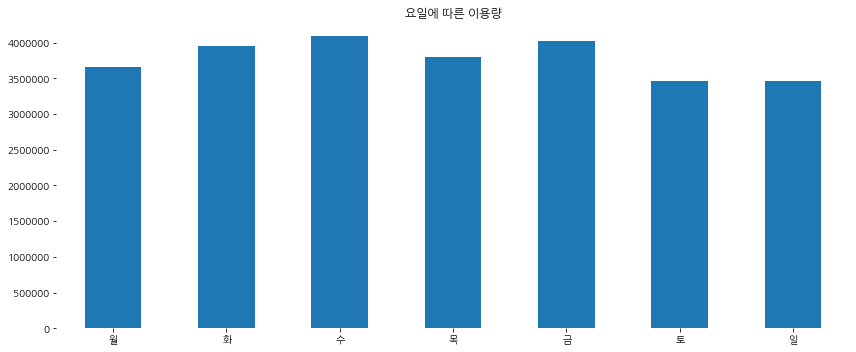

In [43]:
use_by_dayofweek.index = '월 화 수 목 금 토 일'.split()
use_by_dayofweek.plot(kind = 'bar', figsize = (12, 5), rot = 0, title = '요일에 따른 이용량')
plt.box(False)
plt.tight_layout()
plt.show()

- 당연히 주말이 이용량이 많을 줄 알았는데 생각보다 적음
- 오히려 수요일 > 금요일 > 화 > 목 > 월 > 일 > 토 순
- 왜 주말 이용량이 더 적은걸까? 따릉이 이용목적이 여가, 놀이보다는 보조 대중교통수단이려나...

- 평일 vs 주말을 비교해보면

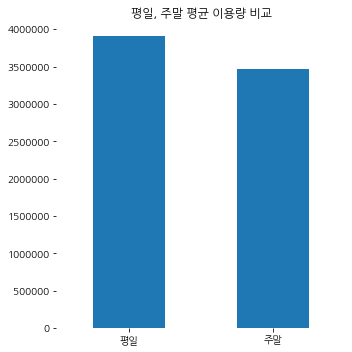

In [45]:
mean_weekday = use_by_dayofweek.loc['월 화 수 목 금'.split()].mean()
mean_weekend = use_by_dayofweek.loc['토 일'.split()].mean()

pd.Series(data = [mean_weekday, mean_weekend], index = ['평일', '주말']).plot(kind = 'bar', figsize = (5, 5), 
                                                                          rot = 0, title = '평일, 주말 평균 이용량 비교')
plt.box(False)
plt.tight_layout()
plt.show()

In [48]:
diff = (mean_weekday - mean_weekend) / mean_weekend * 100
print('평일이 주말대비 %.1f%% 더 많음' %diff)

평일이 주말대비 12.7% 더 많음


## 1.2 시간별 이용량

### 1.2.1 평일

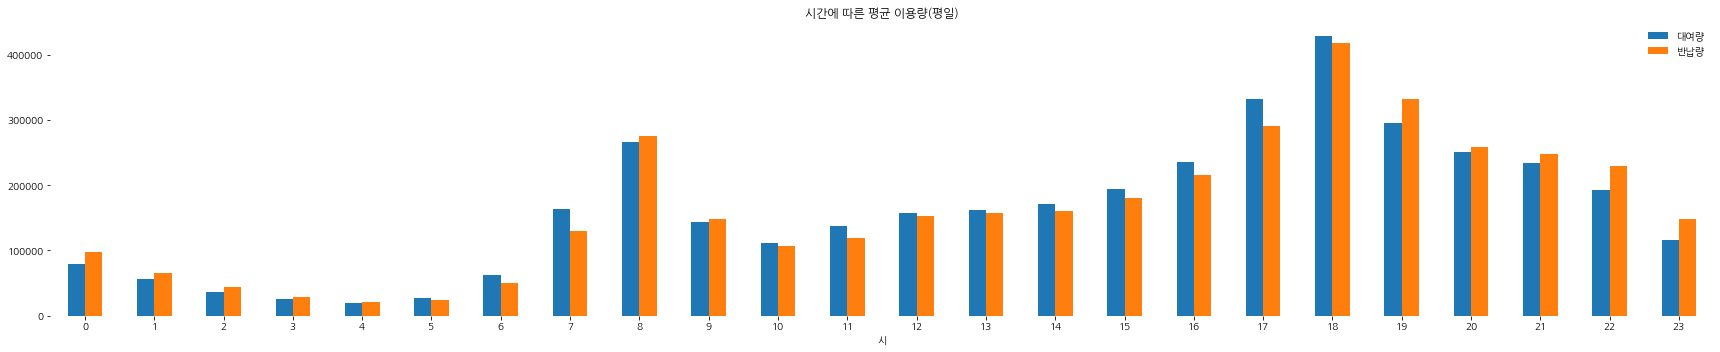

In [49]:
pd.DataFrame(data = {
    '대여량' : df[df['대여요일'].isin(set(range(0, 5)))].groupby('대여시간').size() // 5,
    '반납량' : df[df['대여요일'].isin(set(range(0, 5)))].groupby('반납시간').size() // 5}).plot(kind = 'bar',
                                                                                     figsize = (24, 5), rot = 0,
                                                                                     title = '시간에 따른 평균 이용량(평일)')
plt.xlabel('시')
plt.box(False)
plt.legend(frameon = False)
plt.tight_layout()
plt.show()

- 평일의 경우, 예상대로 출근시간인 7시에 증가하기 시작하여 8시에 많았다가 점차 감소하다가 오후에 다시 증가하기 시작
- 점차 증가하다가 퇴근시간인 18시에 가장 많은 이용량
- 이후 다시 점차 감소함
- 주로 낮에는 대여량 > 반납량이고 19시부터는 반납량 > 대여량임

### 1.2.2 주말

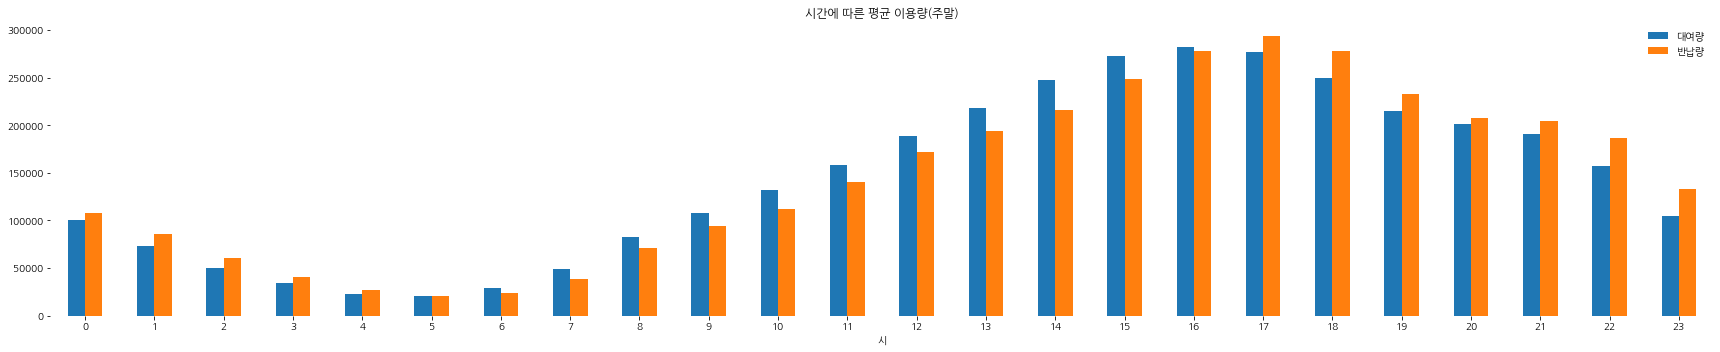

In [50]:
pd.DataFrame(data = {
    '대여량' : df[df['대여요일'].isin(set(range(5, 7)))].groupby('대여시간').size() // 2, 
    '반납량' : df[df['대여요일'].isin(set(range(5, 7)))].groupby('반납시간').size() // 2}).plot(kind = 'bar',
                                                                                    figsize = (24, 5), rot = 0,
                                                                                    title = '시간에 따른 평균 이용량(주말)')
plt.xlabel('시')
plt.box(False)
plt.legend(frameon = False)
plt.tight_layout()
plt.show()

- 주말의 경우 평일과는 양상이 다름
- 평일은 출근시간과 퇴근시간에 증가하고 감소하였는데,
- 주말은 오전부터 점차 증가하였다가 16시, 17시에 최고치를 찍고 다시 점점 감소함
- 대체로 오전 6시부터 16시까지는 대여량 > 반납량이고, 17시부터 오전 4시까지는 반납량 > 대여량임

## 1.3 시간에 따른 자치구별 이용량

대여 - 평일

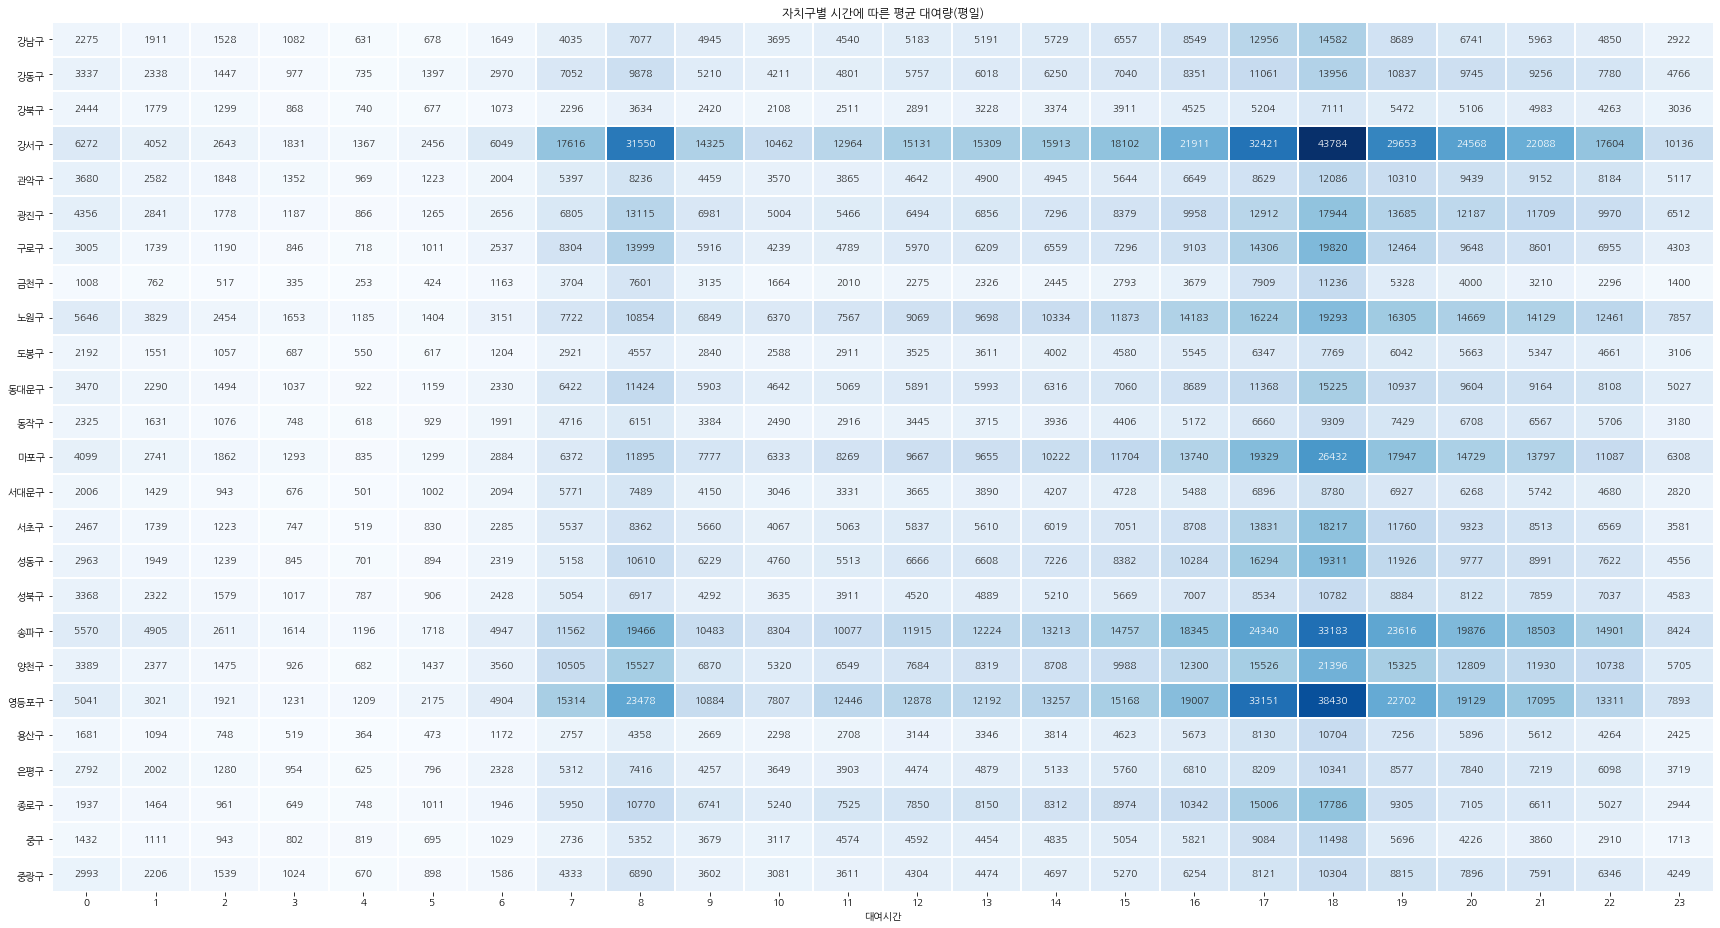

In [54]:
pvt_table = (df[df['대여요일'].isin(set(range(0, 5)))].groupby(['대여지역', '대여시간']).size() // 5).unstack()
# unstack()을 이용해 시리즈를 데이터프레임으로 변경
# df['대여요일'].isin(set(range(0, 5)))은 대여요일이 0~4인 것만 추출

plt.figure(figsize = (24, 13))
sns.heatmap(pvt_table, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, linewidth = 1)
plt.title('자치구별 시간에 따른 평균 대여량(평일)')
plt.ylabel('')
plt.tight_layout()
plt.show()

반납 - 평일

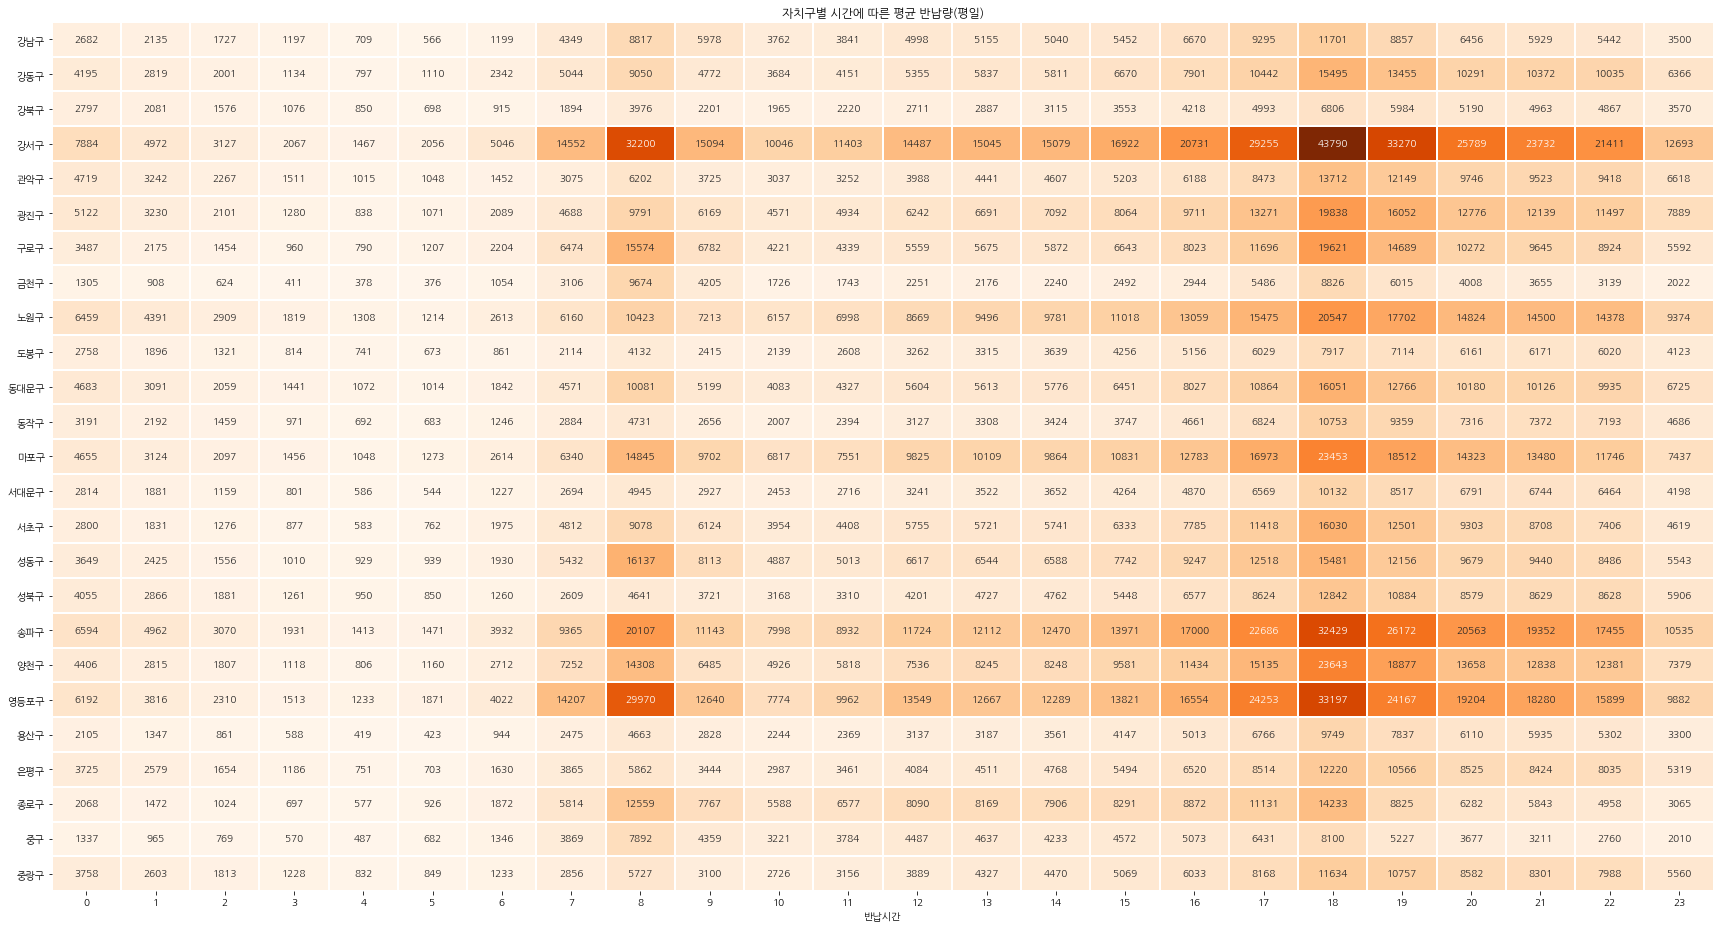

In [55]:
pvt_table = (df[df['대여요일'].isin(set(range(0, 5)))].groupby(['반납지역', '반납시간']).size() // 5).unstack()

plt.figure(figsize = (24, 13))
sns.heatmap(pvt_table, annot = True, fmt = 'd', cmap = 'Oranges', cbar = False, linewidth = 1)
plt.title('자치구별 시간에 따른 평균 반납량(평일)')
plt.ylabel('')
plt.tight_layout()
plt.show()

- 대여, 반납 모두 대부분의 지역에서 7시에 증가하기 시작하여 8시에 많았다가 다시 감소하다가 점차 증가하여 18시에 피크 찍고 다시 감소함
- 대부분의 지역에서 출퇴근시간에 이용량이 많음을 알 수 있음

## 1.4 출퇴근시간에, 이용량의 대여 혹은 반납이 집중되는 자치구는?

- 위 데이터에서 출퇴근 시간의 피크인, 8시, 18시만 가져와서 분석
- 이용량 중 대여와 반납의 비율 확인

In [56]:
pvt_table = (df[df['대여요일'].isin(set(range(0, 5)))].groupby(['대여지역', '대여시간']).size() // 5)
rent = pd.DataFrame([pvt_table.xs(8, level = 1), pvt_table.xs(18, level = 1)], index = [8, 18])
# xs는 피봇테이블에서 해당 인덱스만 추출
rent

대여지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
8,7077,9878,3634,31550,8236,13115,13999,7601,10854,4557,...,10610,6917,19466,15527,23478,4358,7416,10770,5352,6890
18,14582,13956,7111,43784,12086,17944,19820,11236,19293,7769,...,19311,10782,33183,21396,38430,10704,10341,17786,11498,10304


In [58]:
pvt_table = (df[df['대여요일'].isin(set(range(0, 5)))].groupby(['반납지역', '반납시간']).size() // 5)
ret = pd.DataFrame([pvt_table.xs(8, level = 1), pvt_table.xs(18, level = 1)], index = [8, 18])
ret

반납지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
8,8817,9050,3976,32200,6202,9791,15574,9674,10423,4132,...,16137,4641,20107,14308,29970,4663,5862,12559,7892,5727
18,11701,15495,6806,43790,13712,19838,19621,8826,20547,7917,...,15481,12842,32429,23643,33197,9749,12220,14233,8100,11634


In [59]:
total = rent + ret
rent = rent / total
ret = ret / total

In [60]:
morning_diff = pd.DataFrame([rent.T[8], ret.T[8]], index = ['대여', '반납']).T.sort_values('대여')
morning_diff

,대여,반납
성동구,0.396680,0.603320
중구,0.404108,0.595892
영등포구,0.439268,0.560732
금천구,0.440000,0.560000
마포구,0.444839,0.555161
강남구,0.445262,0.554738
종로구,0.461657,0.538343
구로구,0.473371,0.526629
강북구,0.477530,0.522470
서초구,0.479472,0.520528


In [61]:
dinner_diff = pd.DataFrame([rent.T[18], ret.T[18]], index = ['대여', '반납']).T.sort_values('대여')
dinner_diff

,대여,반납
성북구,0.456400,0.543600
은평구,0.458357,0.541643
동작구,0.464012,0.535988
서대문구,0.464255,0.535745
관악구,0.468486,0.531514
중랑구,0.469687,0.530313
강동구,0.473872,0.526128
광진구,0.474935,0.525065
양천구,0.475055,0.524945
노원구,0.484262,0.515738


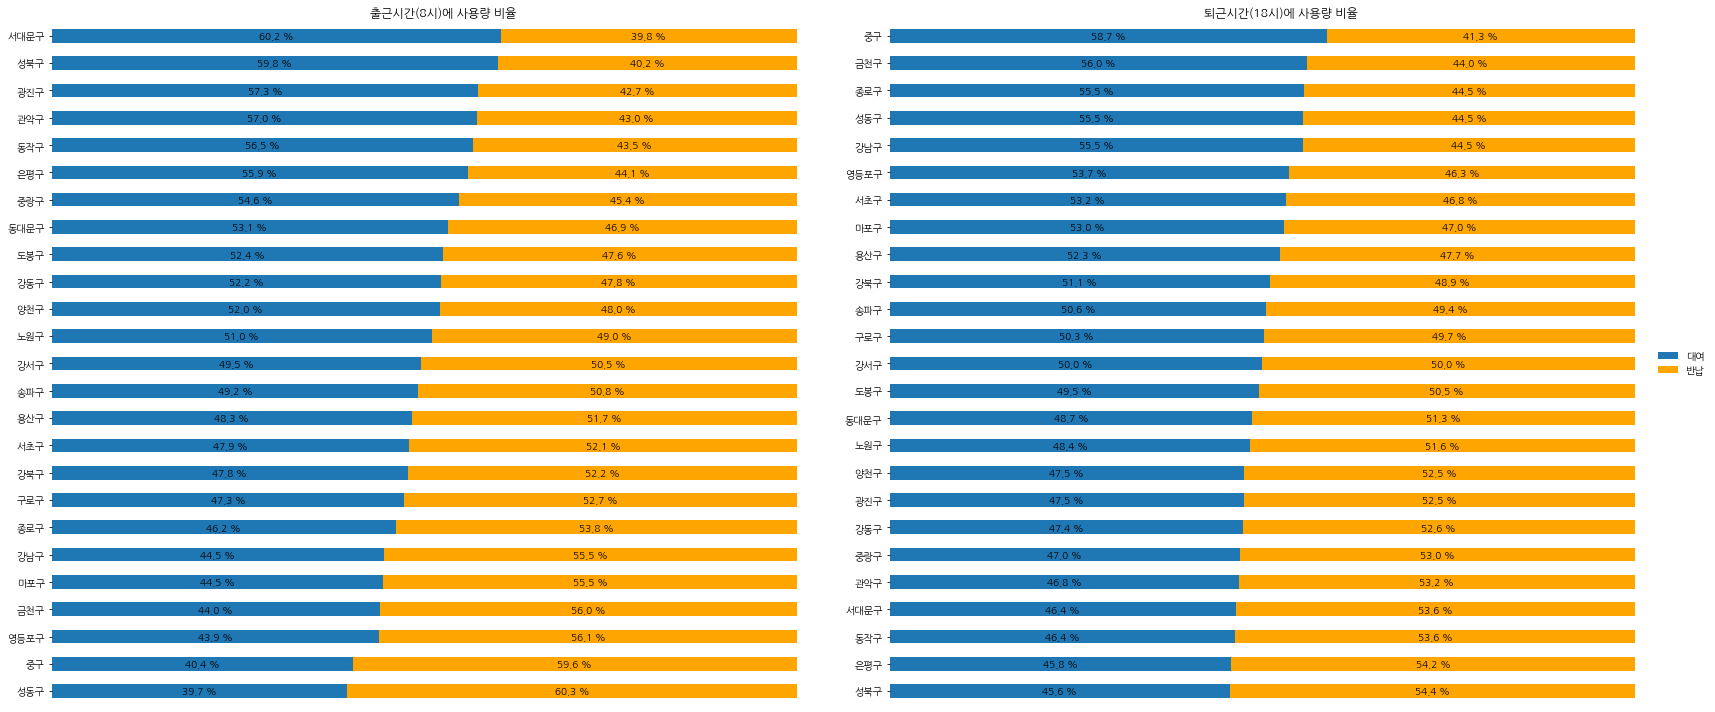

In [63]:
fig, axes = plt.subplots(1, 2, figsize = (24, 10))

for i, (diff, time_name) in enumerate(zip([morning_diff, dinner_diff], ['출근시간(8시)', '퇴근시간(18시)'])):
    # zip은 같은 길이의 리스트를 같은 인덱스끼리 잘라서 리스트로 변환
    ax = diff.plot(kind = 'barh', color = ['C0', 'orange'], stacked = True, title = '%s에 사용량 비율'%time_name, ax = axes[i])
    
    for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax.annotate('%.1f %%'%(width * 100), xy = (left + width / 2, bottom + height / 2), ha = 'center', va = 'center')
        
        plt.sca(ax)
        plt.xticks([])
        plt.box(False)
axes[0].get_legend().remove()
plt.legend(loc = 'center left', bbox_to_anchor = (0.97, 0.5), frameon = False)
plt.tight_layout()
plt.show()